# InSbAs quantum well

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from spsolve import solver

plt.rcParams.update({"font.size": 15})

In [2]:
layer1 = solver.Material("AlInSb", 200, 0.1)
layer2 = solver.Material("InSbAs", 30, 0)
layer3 = solver.Material("SiNx", 40)
stacked = solver.StackedLayers(0, 300, (False, 0), (True, 0), layer1, layer2, layer3)
stacked.schrod_where = (150, 229)
stacked.CBO = -0.26552287

In [3]:
band, modes, energies, rho = stacked.solve_snider()

## Figure

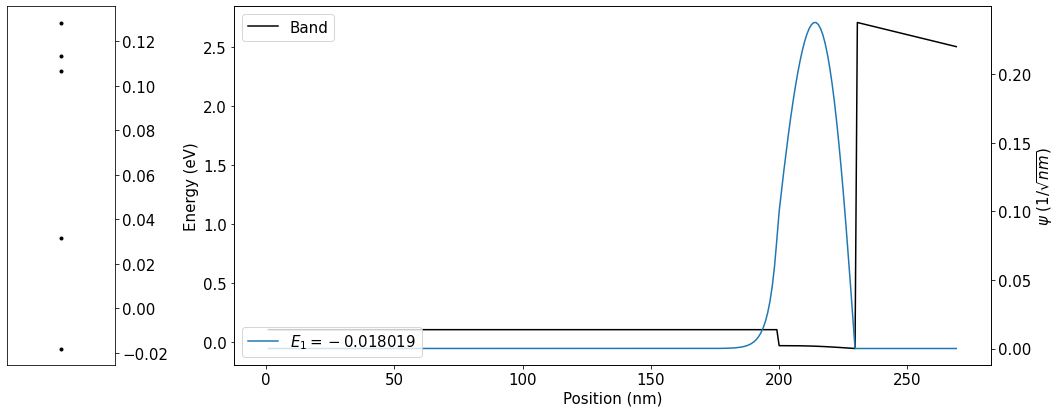

In [5]:
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 7])

ax = plt.subplot(gs[1])
ax.plot(stacked.grid, band, color="k", label="Band")
ax.set_xlabel("Position (nm)")
ax.set_ylabel("Energy (eV)")
ax.legend(loc=2)

ax1 = ax.twinx()
i = 0
while energies[i] < 0 and i < len(energies):
    ax1.plot(
        stacked.grid, modes[:, i], label="$E_{:d} = {:3f}$".format(i + 1, energies[i])
    )
    i += 1
ax1.legend(loc=3)
ax1.set_ylabel("$\psi$ ($1/\sqrt{nm}$)")

n_E = 5
ax2 = plt.subplot(gs[0])
ax2.scatter(np.zeros(n_E), energies[0:n_E], marker=".", color="k")
ax2.yaxis.tick_right()
ax2.tick_params(axis="x", which="both", bottom=False, labelbottom=False)

fig.set_size_inches(15, 6)
fig.tight_layout()
plt.show()

## k.p
Top plot are the band offsets without adding the electrostatic potential. Electrostatic potential is added before plotting the bottom figure. 

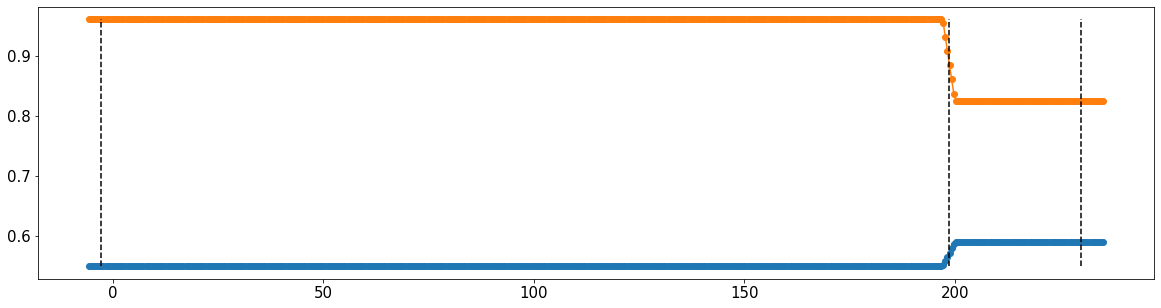

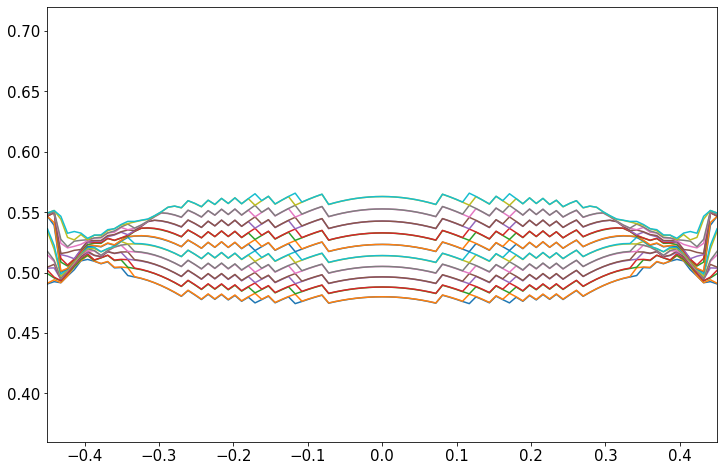

In [6]:
stacked.solve_k_dot_p(band)